In [1]:
import os
import math
from collections import defaultdict
from typing import List 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_theme(style='whitegrid', font_scale=1.5, palette='muted', 
              rc={'font.family':'serif', 'font.serif':'Times New Roman'})

In [42]:
PROJECT_FOLDER = os.path.dirname(os.path.abspath(''))
DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data')

titlesize = 22

cols_to_display = ['full_name', 'source_corpus', 'word_embedding_type', 'preprocess_text', 'kind',
                   'accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']

def managa_kind(row) -> str:
    kind = row['full_name'].split('-')[0] + ' ' + row['source_corpus']
    if row['preprocess_text']:
        kind += ' lemm'
    return kind

def load_df(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['kind'] = df.apply(lambda row: managa_kind(row), axis=1)
    return df

def visualize_results(df: pd.DataFrame, suptitle: str = ''):      
    measures_to_plot = ['accuracy', 'macro avg_f1-score', 'macro avg_recall', 'macro avg_precision']
    
    measures_to_plot_title = {
        'accuracy': 'Dokładność',
        'macro avg_f1-score': 'Makro F1',
        'macro avg_recall': 'Makro czułość',
        'macro avg_precision': 'Makro precyzja'
    }
    
    fig, axs = plt.subplots(1, len(measures_to_plot), figsize=(12, 5), constrained_layout=True, sharey=True)
    
#     axs = [item for sublist in axs for item in sublist]
    
    min_val = min([df[m].min() for m in measures_to_plot]) - 0.02
    
    for measure, ax in zip(measures_to_plot, axs):
        sns.barplot(x='word_embedding_type', y=measure, hue='kind', edgecolor="0", data=df, ax=ax)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
        ax.set_ylim(bottom=min_val)
        ax.set_xlabel('typ word embedding-u')
        
#         title = measure.replace('_',' ').replace('-',' ').capitalize()
        title = measures_to_plot_title[measure]
        ax.set_title(title, fontsize=titlesize)
        ax.set_ylabel('wartość')
    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Typ modelu', ncol=2,
               loc='lower center', bbox_to_anchor=(0.5, -0.25), borderaxespad=0.)
    
    for ax in axs:
        ax.get_legend().remove()
    
    fig.suptitle(suptitle, fontsize=titlesize+4)
    file_name = suptitle + '.pdf'
    fig.savefig(file_name, bbox_inches='tight')    

# Rezultaty

In [36]:
file_name = 'results.csv'
file_path = os.path.join(DATA_FOLDER, file_name)

df = load_df(file_path)

# with pd.option_context('display.max_columns', None):
#     display(df.head(2))

In [37]:

df[cols_to_display]

,full_name,source_corpus,word_embedding_type,preprocess_text,kind,accuracy,macro avg_f1-score,macro avg_recall,macro avg_precision
0,MLP-fasttext-model_train_base.bin-run-1,tripadvisor,fasttext,False,MLP tripadvisor,0.746076,0.687265,0.673871,0.708114
1,MLP-fasttext-model_train_clean.bin-run-1,tripadvisor,fasttext,True,MLP tripadvisor lemm,0.724346,0.637374,0.619456,0.695193
2,MLP-fasttext-model_wiki_base.bin-run-1,wikipedia,fasttext,False,MLP wikipedia,0.659557,0.551975,0.540128,0.662875
3,MLP-fasttext-model_wiki_clean.bin-run-1,wikipedia,fasttext,True,MLP wikipedia lemm,0.625352,0.494805,0.515694,0.527288
4,MLP-word2vec-word2vec_train_base.model-run-1,tripadvisor,word2vec,False,MLP tripadvisor,0.703018,0.587285,0.576920,0.734839
5,MLP-word2vec-word2vec_train_clean.model-run-1,tripadvisor,word2vec,True,MLP tripadvisor lemm,0.688531,0.558924,0.564569,0.677153
6,MLP-word2vec-word2vec_wiki_base.model-run-1,wikipedia,word2vec,False,MLP wikipedia,0.608048,0.529906,0.505959,0.631455
7,MLP-word2vec-word2vec_wiki_clean.model-run-1,wikipedia,word2vec,True,MLP wikipedia lemm,0.603219,0.476146,0.486886,0.649375


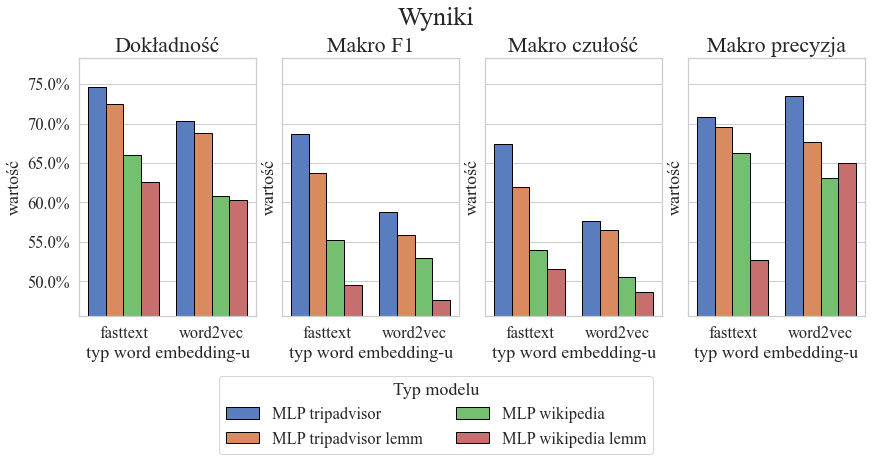

In [43]:
visualize_results(df, suptitle='Wyniki')

In [39]:
df.columns.values

array(['full_name', 'name', 'source_corpus', 'word_embedding_type',
       'preprocess_text', 'input_size', 'hidden_size', 'output_size',
       'dropout', 'batch_size', 'learning_rate', 'epochs', 'weight_decay',
       'accuracy', 'z_amb_precision', 'z_amb_recall', 'z_amb_f1-score',
       'z_amb_support', 'z_minus_m_precision', 'z_minus_m_recall',
       'z_minus_m_f1-score', 'z_minus_m_support', 'z_plus_m_precision',
       'z_plus_m_recall', 'z_plus_m_f1-score', 'z_plus_m_support',
       'z_zero_precision', 'z_zero_recall', 'z_zero_f1-score',
       'z_zero_support', 'macro avg_precision', 'macro avg_recall',
       'macro avg_f1-score', 'macro avg_support',
       'weighted avg_precision', 'weighted avg_recall',
       'weighted avg_f1-score', 'weighted avg_support', 'kind'],
      dtype=object)

In [34]:

f1_cols = ['kind', 'word_embedding_type',
           'z_plus_m_f1-score', 'z_amb_f1-score',
           'z_zero_f1-score', 'z_minus_m_f1-score', 'macro avg_f1-score']
df2 = df[f1_cols]
df2['model'] = df.apply(lambda row: row['kind'] + ' ' + row['word_embedding_type'], axis=1)
df2 = df2.drop(['kind', 'word_embedding_type'], axis='columns')
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]

for c in ['z_plus_m_f1-score', 'z_amb_f1-score', 
          'z_zero_f1-score', 'z_minus_m_f1-score', 'macro avg_f1-score']:
    df2[c] = df2[c].apply(lambda v: round(100*v, 2))
    
df2
df2.to_csv('f1_results.csv', index=False)
                         

C:\Users\wojte\AppData\Local\Temp/ipykernel_17220/3386643943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['model'] = df.apply(lambda row: row['kind'] + ' ' + row['word_embedding_type'], axis=1)
